In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as smp

## Question 1

Equilibrium conversion for temperatures from 300 to 900 K for range of pressures for the following equation: <br> 
$N_2 + 3H_2 \rightleftharpoons 2NH_3$

In [2]:
T = np.linspace(300,900,6001) #Temperatures in K
P = np.array([1e5, 2e5, 5e5, 10e5]) # Pressures in Pa

As entropy (S) is a state variable:     
    $\Delta S^o_{rxn} = \sum S^o_{products} - \sum S^o_{reactants}$
<br><br>
Similarly enthalpy is a state variable:     
$\Delta H^o_{rxn} = \sum \Delta H^o_{f, products} - \sum \Delta H^o_ {f,reactants}$  
However, as reactants are elements:  
$\Delta H^o_{rxn} = \sum \Delta H^o_{f, products}$
<br><br>
From expression for Gibb's Free Energy:     
$\Delta G_{rxn}^o = \Delta H_{rxn}^o - T \Delta S_{rxn}^o$

In [3]:
delta_h_rxn = -45.94 * 1000 * 2 #J/mol # @std cond

s_n2 = 191.609 #J/mol
s_h2 = 130.680 #J/mol
s_nh3 = 192.77 #J/mol

delta_s = 2*s_nh3 - (3*s_h2 + s_n2)
delta_g_rxn = delta_h_rxn - 298 * delta_s


print(f"Enthalpy Change of Reaction: {round(delta_h_rxn,2)}")
print(f"Entropy Change of Reaction: {round(delta_s,2)}")
print(f"Gibbs Free Energy Change of Reaction: {round(delta_g_rxn,2)}")

Enthalpy Change of Reaction: -91880.0
Entropy Change of Reaction: -198.11
Gibbs Free Energy Change of Reaction: -32843.52


Equilibrium constant, K, can be calculated from $\Delta G$  
$K^o = exp(\frac{-\Delta G}{R T})$

In [4]:
R = 8.314 # J/mol K

K = np.exp(-delta_g_rxn/(R*298))
print(f"Equilibrium Constant: {K}")

Equilibrium Constant: 571678.7057483412


Using van't Hofft law:      
$ln(\frac{K_T}{K^o}) = \frac{\Delta H}{R} (\frac{1}{T}- \frac{1}{298})$     
$ K_T = K_o \cdot e^{\frac{\Delta H}{R} (\frac{1}{T}- \frac{1}{298})}$       

In [5]:
K_T = K * np.exp(delta_h_rxn/R * (1/298 - 1/T)) 

K_T

array([4.46458225e+05, 4.41011421e+05, 4.35634630e+05, ...,
       9.67003927e-06, 9.65685055e-06, 9.64368275e-06])

Expression for equilibrium constant from partial pressures:         
$K_P=\frac{p_{NH_3}^2}{p_{N_2}p_{H_2}^3}=\frac{y_{NH3}^2}{y_{N_2}y_{H_2}^3}\cdot\frac{1}{P^2}$      
Which can be written as:        
$K_P=\frac{16x^2\left(x-2\right)^2}{\left(1-x\right)\left(3-3x\right)^3}\cdot\frac{1}{P^2}$     
Rearranging in terms of x:      
$\mathrm{x=}\frac{\mathrm{1}}{\mathrm{2P^2}}\left(\sqrt{\frac{\mathrm{12}\left(\mathrm{4}\sqrt{\mathrm{3K}}\mathrm{-9K} \right)}{\mathrm{27K-16}}\mathrm{+4} }\mathrm{+2} \right)$

In [6]:
K_, P_, X_ = smp.symbols("K_T p_ X")
eqn = smp.Eq(K_, 16*X_**2*(X_- 2)**2/((1 - X_)*(3 - 3*X_)**3)*1/P_**2)
smp.solve(eqn, X_)

[1 - 2*sqrt(-3*sqrt(3)*sqrt(K_T)*p_/(27*K_T*p_**2 - 16) - 4/(27*K_T*p_**2 - 16)),
 1 - 2*sqrt(3*sqrt(3)*sqrt(K_T)*p_/(27*K_T*p_**2 - 16) - 4/(27*K_T*p_**2 - 16)),
 2*sqrt(-3*sqrt(3)*sqrt(K_T)*p_/(27*K_T*p_**2 - 16) - 4/(27*K_T*p_**2 - 16)) + 1,
 2*sqrt(3*sqrt(3)*sqrt(K_T)*p_/(27*K_T*p_**2 - 16) - 4/(27*K_T*p_**2 - 16)) + 1]

In [7]:
p_ = P[0]

X_  = [
    1 - 2*np.sqrt(-3*np.sqrt(3)*np.sqrt(K_T)*p_/(27*K_T*p_**2 - 16) - 4/(27*K_T*p_**2 - 16)),
    1 - 2*np.sqrt(3*np.sqrt(3)*np.sqrt(K_T)*p_/(27*K_T*p_**2 - 16) - 4/(27*K_T*p_**2 - 16)),
    2*np.sqrt(-3*np.sqrt(3)*np.sqrt(K_T)*p_/(27*K_T*p_**2 - 16) - 4/(27*K_T*p_**2 - 16)) + 1,
    2*np.sqrt(3*np.sqrt(3)*np.sqrt(K_T)*p_/(27*K_T*p_**2 - 16) - 4/(27*K_T*p_**2 - 16)) + 1
]

X_

C:\Users\abhir\AppData\Local\Temp\ipykernel_19756\875237820.py:4: RuntimeWarning: invalid value encountered in sqrt
  1 - 2*np.sqrt(-3*np.sqrt(3)*np.sqrt(K_T)*p_/(27*K_T*p_**2 - 16) - 4/(27*K_T*p_**2 - 16)),
C:\Users\abhir\AppData\Local\Temp\ipykernel_19756\875237820.py:6: RuntimeWarning: invalid value encountered in sqrt
  2*np.sqrt(-3*np.sqrt(3)*np.sqrt(K_T)*p_/(27*K_T*p_**2 - 16) - 4/(27*K_T*p_**2 - 16)) + 1,


[array([nan, nan, nan, ..., nan, nan, nan]),
 array([0.99989266, 0.99989233, 0.999892  , ..., 0.95030701, 0.9502901 ,
        0.95027318]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 array([1.00010734, 1.00010767, 1.000108  , ..., 1.04969299, 1.0497099 ,
        1.04972682])]

In [8]:
x = [0.5*(np.sqrt((12*(4*p*np.sqrt(3*K_T)-9*p**2*K_T))/ (27*p**2*K_T-16)+4)+2) for p in P]

x = [1 - 2*np.sqrt(3*np.sqrt(3)*np.sqrt(K_T)*p/(27*K_T*p**2 - 16) - 4/(27*K_T*p**2 - 16)) for p in P]

In [9]:
df = (
    pd.DataFrame(x)
    .transpose()
    .set_index(T)
    .rename_axis("Temperature")
    )
df.columns = ["1 bar", "2 bar", "5 bar", "10 bar"]

df

,1 bar,2 bar,5 bar,10 bar
Temperature,,,,
300.0,0.999893,0.999924,0.999952,0.999966
300.1,0.999892,0.999924,0.999952,0.999966
300.2,0.999892,0.999924,0.999952,0.999966
300.3,0.999892,0.999923,0.999952,0.999966
300.4,0.999891,0.999923,0.999951,0.999966
...,...,...,...,...
899.6,0.950341,0.964864,0.977770,0.984279
899.7,0.950324,0.964852,0.977762,0.984274
899.8,0.950307,0.964840,0.977755,0.984268


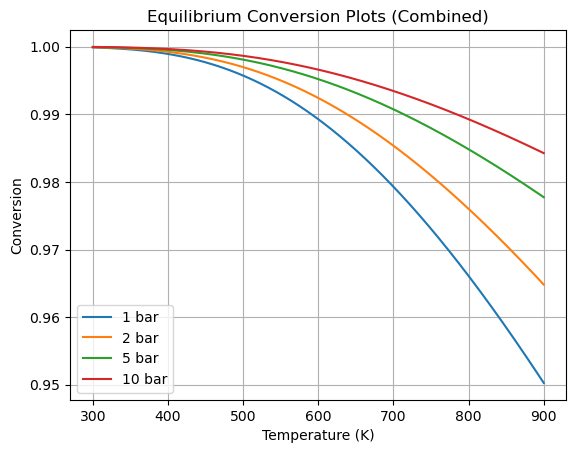

In [10]:
df.plot(
    ylabel="Conversion", 
    xlabel="Temperature (K)",
    title="Equilibrium Conversion Plots (Combined)",
    grid=True
    );

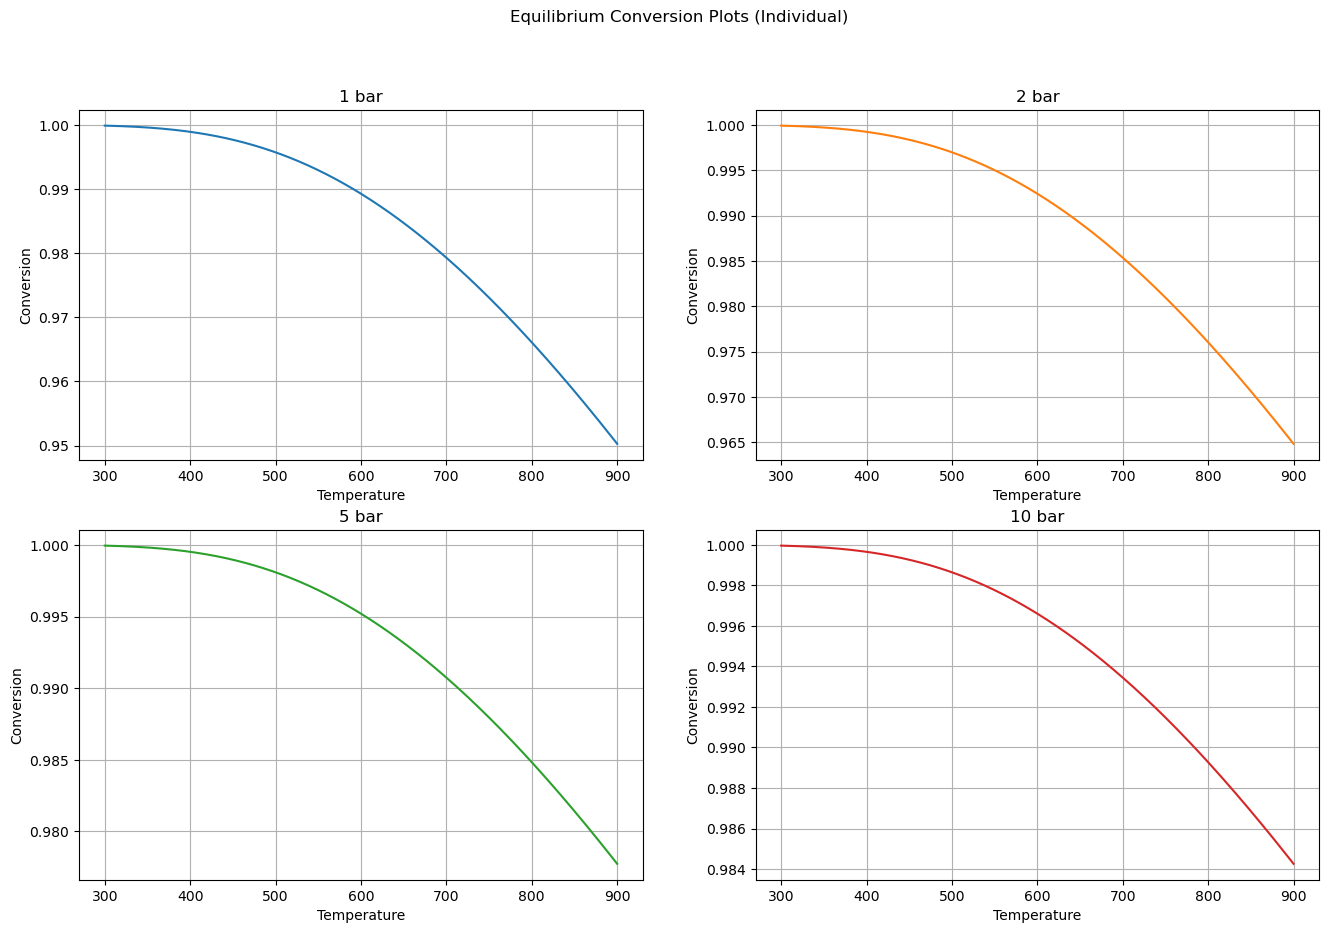

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(16,10))
fig.suptitle('Equilibrium Conversion Plots (Individual)')
df["1 bar"].plot(ax=axs[0,0], color="C0", ylabel="Conversion", title="1 bar", grid=True)
df["2 bar"].plot(ax=axs[0,1], color="C1", ylabel="Conversion", title="2 bar", grid=True)
df["5 bar"].plot(ax=axs[1,0], color="C2", ylabel="Conversion", title="5 bar", grid=True)
df["10 bar"].plot(ax=axs[1,1], color="C3", ylabel="Conversion", title="10 bar", grid=True);